<a href="https://colab.research.google.com/github/jkchandalia/nlpower/blob/main/notebooks/4.1%20Generative_AI_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generative AI - Diffusion**

In [1]:
#@title **Setup**
!pip install transformers diffusers accelerate| grep -v -e 'already satisfied' -e 'Downloading'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## [Diffusion](https://huggingface.co/docs/diffusers/index)

### Model Overview
<figure>
<img src='https://drive.google.com/uc?export=view&id=1uxgwq-S1S60Oyuuhu3b64hDhdF61_tBo' alt="CLIP Model", width="1000" height="550"/>
</figure>

A key component of Stable Diffusion is embedding alignment between related text and images. 

This allows us to go from **text -> text embedding -> image embedding**. 

In [2]:
#@title Import libraries
import os
import torch
import requests

from diffusers import DiffusionPipeline, StableDiffusionImg2ImgPipeline
from io import BytesIO
from PIL import Image


### *Model*

In [3]:
device = "cuda"
generator = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16
    ).to(device)


/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


### *Prompt*

In [20]:
prompt = "An image of a squirrel in Monet style"
prompt2 = "a black and white cartoon of friendly monster eating ice cream in the style of shell silverstein"

### *Image Generation from Text*
Demo is adapted from this [documentation](https://huggingface.co/docs/diffusers/using-diffusers/conditional_image_generation)

  0%|          | 0/50 [00:00<?, ?it/s]

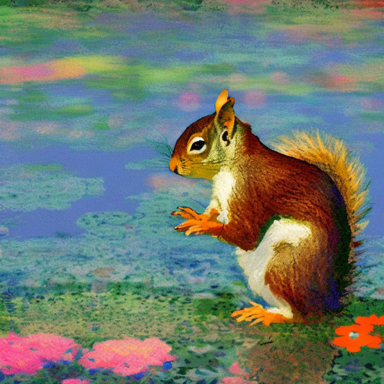

In [5]:
image = generator(prompt, num_inference_steps=50).images[0]

# Save your image by uncommenting below
#image.save("image_of_squirrel_painting.png")

image.thumbnail((384, 384))
image

Parameters to tweak are: 

1. the text prompt 

2. num_inference_steps, the more steps the clearer the final image


  0%|          | 0/50 [00:00<?, ?it/s]

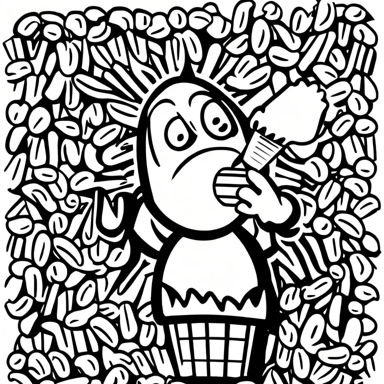

In [21]:
image = generator(prompt2).images[0]
image.thumbnail((384, 384))
image

#### What do we think of the output? Let's try the same prompt in [DALL-E 2](https://labs.openai.com/) and compare.

***

### *Model*
Demo is adapted from this [documentation](https://huggingface.co/docs/diffusers/using-diffusers/img2img)

In [13]:
# Load the pipeline

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16).to(
    'cuda'
    )

### *Initial Image*

In [8]:
# Let's download an initial image. Use the cell below if you have your own image
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
 

If you have your own image that you would like to use, please upload into the sample_data folder provided by Colab.

In [9]:
# Check that your image has been uploaded correctly
os.listdir('./sample_data')

# Uncomment below to read image
#init_image = Image.open('./sample_data/<your image name>')
#init_image.thumbnail((768, 768))

['README.md',
 'anscombe.json',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_train.csv',
 'california_housing_test.csv']

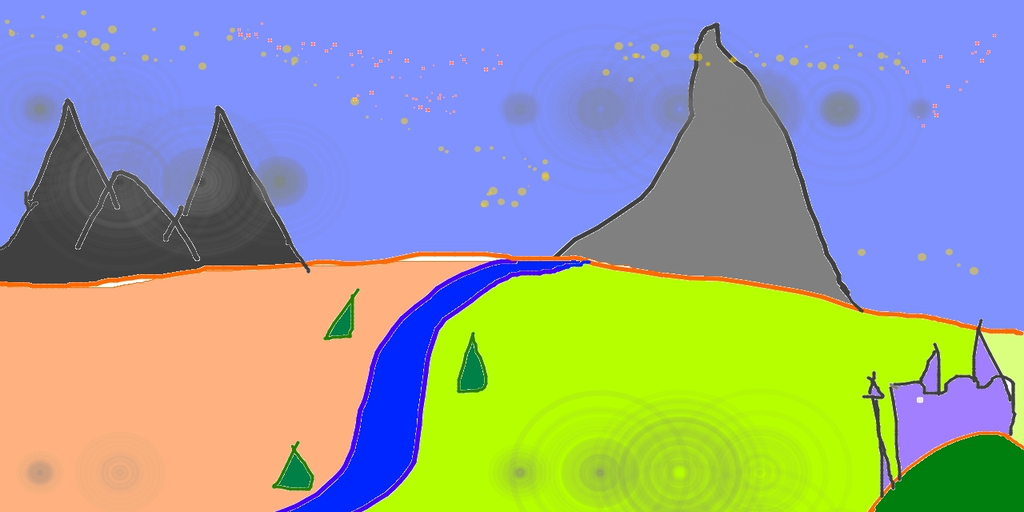

In [10]:
init_image

### *Prompt*

In [14]:
prompt = "ghibli style, a fantasy landscape with castles"

### *Image Generation from both Text and Image*

  0%|          | 0/80 [00:00<?, ?it/s]

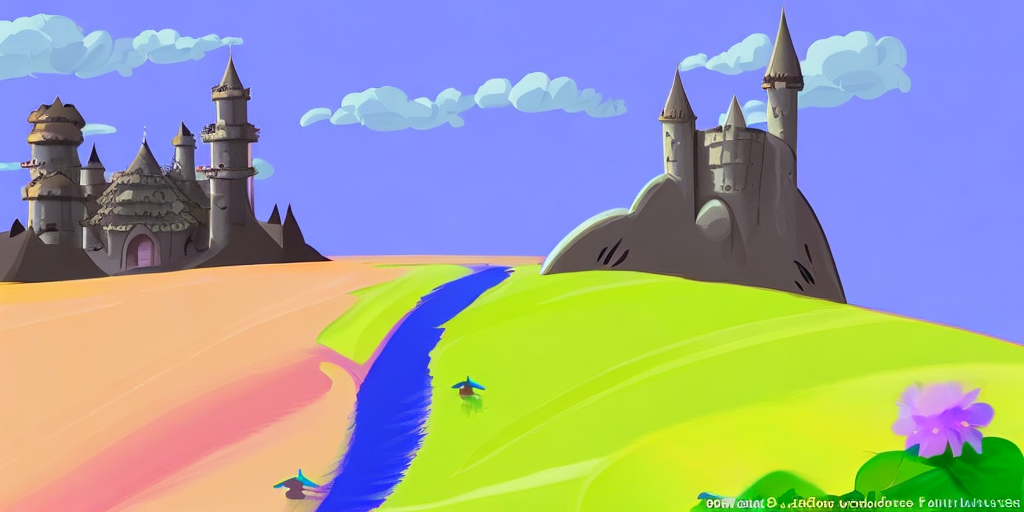

In [19]:
images = pipe(prompt=prompt, image=init_image, strength=.8, guidance_scale=7.5, num_inference_steps=100).images
#images[0].save("fantasy_landscape.png")

images[0]

Parameters to tweak are: 

1. the text prompt 

2. num_inference_steps, the more steps the clearer the final image


3. the strength of the noise we introduce (0 reproduces the original image and 1 allows most freedom) 

4. guidance (how important the text prompt is)